In [ ]:
#DAY 4

In [ ]:
#TASK 1

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,20.674667358398438,21.0086669921875,19.920000076293945,20.406667709350586,174879000
3,2019-01-03,20.02400016784668,20.626667022705078,19.825332641601562,20.46666717529297,104478000
4,2019-01-04,21.179332733154297,21.200000762939453,20.18199920654297,20.399999618530273,110911500


In [3]:

df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

df = df.iloc[1:].reset_index(drop=True)

df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000.0
1,2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000.0
2,2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500.0
3,2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000.0
4,2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
mse, r2

(7.615489197357542, 0.9993981510292679)

In [ ]:
#TASK 2

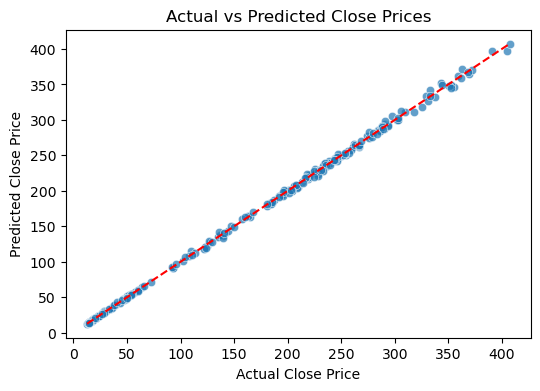

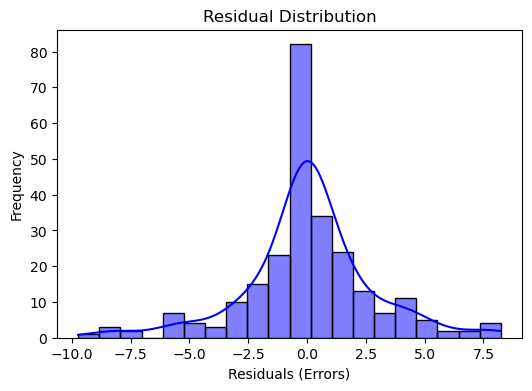

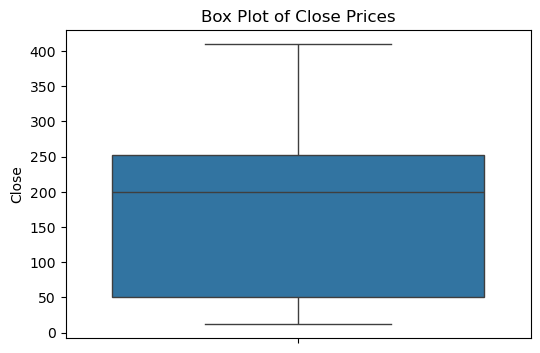

In [9]:
# Scatter plot: Actual vs Predicted Close Prices
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--") # Perfect fit line
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=20, kde=True, color="blue")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Boxplot of Close Prices
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Close"])
plt.title("Box Plot of Close Prices")
plt.show()

In [ ]:
#TASK 3 AND TASK 4

C:\Users\Dharani Ravi\AppData\Local\Temp\ipykernel_18624\1179982730.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Open_High"] = X["Open"] * X["High"]


Mean Squared Error (MSE): 7.6671
R-squared Score (R²): 0.9994


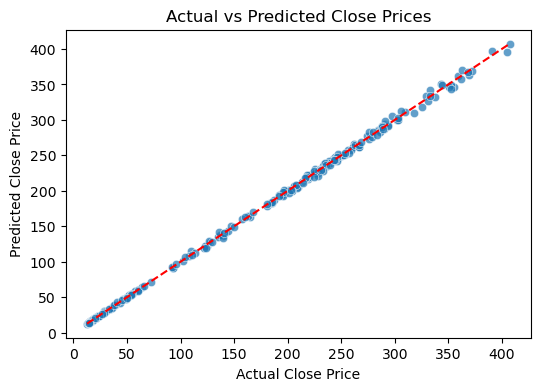

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"  # Update this if needed
df = pd.read_csv(file_path, skiprows=1)

# Rename columns correctly
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)

# Convert numeric columns to float
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Add interaction terms for multiple regression
X["Open_High"] = X["Open"] * X["High"]
X["Low_Volume"] = X["Low"] * X["Volume"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

# Scatter plot: Actual vs Predicted Close Prices
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--") # Perfect fit line
plt.show()

In [ ]:
#TASK 5

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"  # Update this if needed
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Add interaction terms
X["Open_High"] = X["Open"] * X["High"]
X["Low_Volume"] = X["Low"] * X["Volume"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Feature Impact Analysis
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("Feature Importance:")
print(feature_importance)


Feature Importance:
      Feature   Coefficient
0        Open -6.697321e-01
1        High  8.419169e-01
2         Low  8.274155e-01
3      Volume -1.604349e-09
4   Open_High -7.442199e-06
5  Low_Volume  3.239899e-11


C:\Users\Dharani Ravi\AppData\Local\Temp\ipykernel_18624\1281249617.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Open_High"] = X["Open"] * X["High"]


In [ ]:
#TASK 6

C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


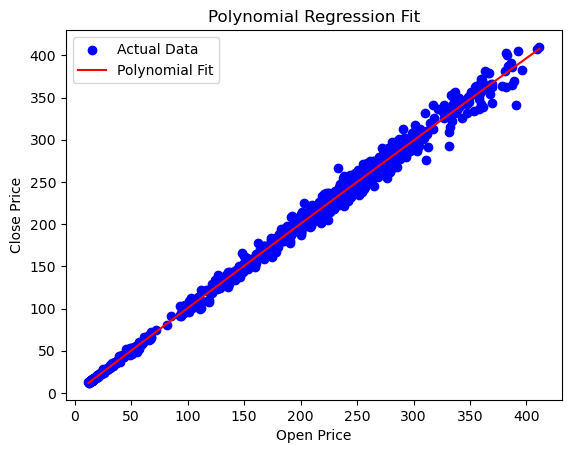

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Load the dataset
file_path =  "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"  # Update this if needed
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

# Define features (X) and target (y)
X = df[["Open"]]  # Using 'Open' price as an example feature
y = df["Close"]

# Polynomial Regression Model (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

# Predict values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = poly_model.predict(X_range)

# Plot results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X_range, y_pred, color="red", label="Polynomial Fit")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

In [ ]:
#TASK 7

Original Model R² Score: 0.9993608491174831
Cleaned Model R² Score: 0.9993483076646437


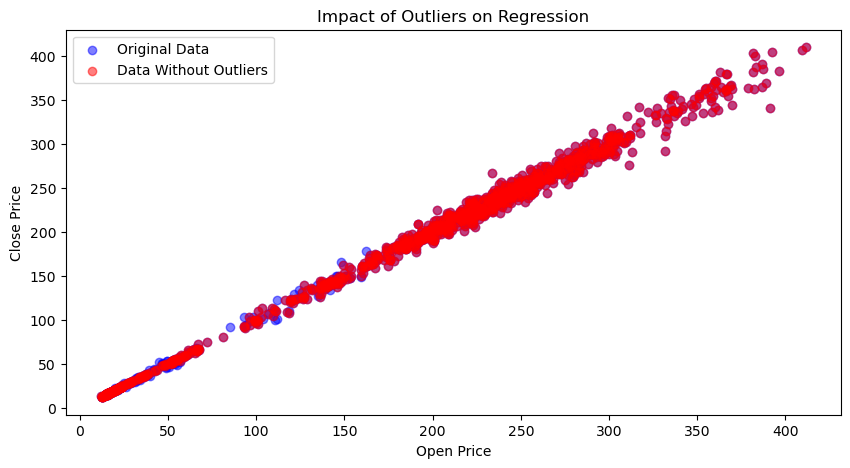

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"  # Update this if needed
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Detecting and Removing Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Train model on original data
model_original = LinearRegression()
model_original.fit(X, y)
original_score = model_original.score(X, y)

# Train model on cleaned data
X_no_outliers = df_no_outliers[["Open", "High", "Low", "Volume"]]
y_no_outliers = df_no_outliers["Close"]
model_cleaned = LinearRegression()
model_cleaned.fit(X_no_outliers, y_no_outliers)
cleaned_score = model_cleaned.score(X_no_outliers, y_no_outliers)

# Print Model Performance
print("Original Model R² Score:", original_score)
print("Cleaned Model R² Score:", cleaned_score)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.scatter(df["Open"], y, color="blue", label="Original Data", alpha=0.5)
plt.scatter(df_no_outliers["Open"], y_no_outliers, color="red", label="Data Without Outliers", alpha=0.5)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Impact of Outliers on Regression")
plt.legend()
plt.show()


In [ ]:
#TASK 8

C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.281e+03, tolerance: 1.474e+03
  model = cd_fast.enet_coordinate_descent(


Ridge Model R² Score: 0.9990600270450656
Lasso Model R² Score: 0.9988359202151507


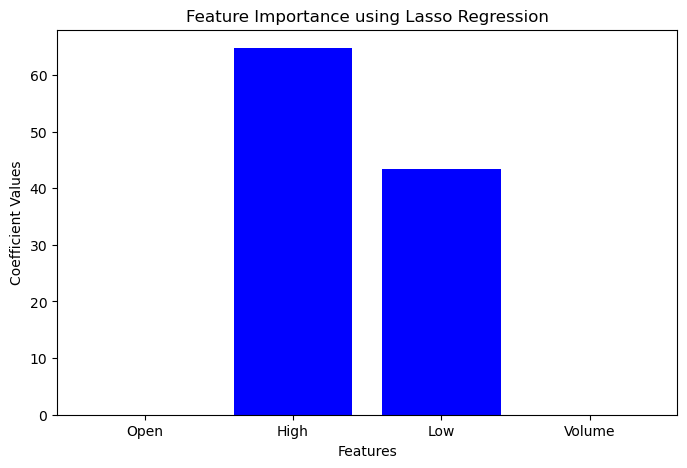

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"  # Update this if needed
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementing Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y)
ridge_score = ridge_model.score(X_scaled, y)

# Implementing Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_scaled, y)
lasso_score = lasso_model.score(X_scaled, y)

# Print Model Performance
print("Ridge Model R² Score:", ridge_score)
print("Lasso Model R² Score:", lasso_score)

# Plot Feature Importance (Lasso)
plt.figure(figsize=(8, 5))
plt.bar(X.columns, lasso_model.coef_, color="blue")
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Feature Importance using Lasso Regression")
plt.show()


In [21]:
#BONUS TASK

Linear Regression Model Performance:
Mean Squared Error: 7.615489198487486
R² Score: 0.9993981510291785
Ridge Model R² Score: 0.9988991445849555
Lasso Model R² Score: 0.9987757368689971


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+03, tolerance: 1.155e+03
  model = cd_fast.enet_coordinate_descent(


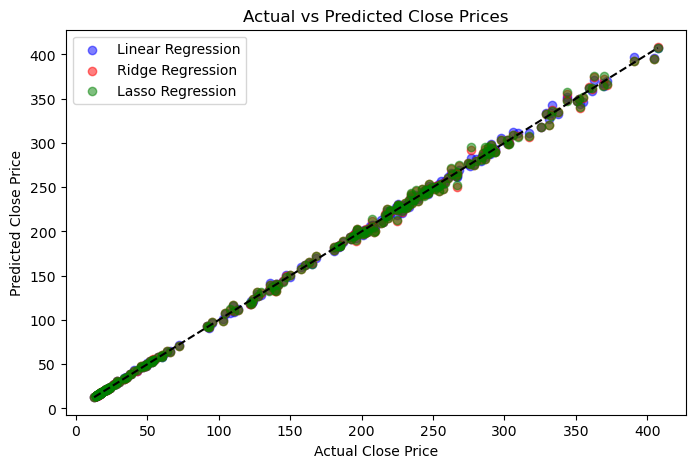

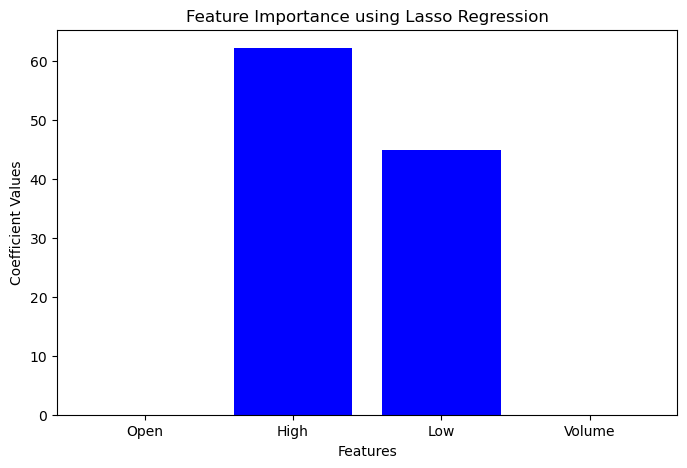

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"  # Update this if needed
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Implementing Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_score = r2_score(y_test, y_pred_ridge)

# Implementing Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
lasso_score = r2_score(y_test, y_pred_lasso)

# Print Model Performance
print("Ridge Model R² Score:", ridge_score)
print("Lasso Model R² Score:", lasso_score)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color="red", label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color="green", label="Lasso Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.legend()
plt.show()

# Plot Feature Importance (Lasso)
plt.figure(figsize=(8, 5))
plt.bar(X.columns, lasso_model.coef_, color="blue")
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Feature Importance using Lasso Regression")
plt.show()